In [1]:
import pandas as pd

In [2]:
spotify_trend = pd.read_excel("Spotify tracks.xlsx", header=None)

In [3]:
spotify_trend.columns = [
    "Timestamp", "Track", "Artist", "Track ID", "Track URL"
]

In [4]:
#  Remove " at " and convert timestamp to datetime
spotify_trend["Timestamp"] = pd.to_datetime(
    spotify_trend["Timestamp"].str.replace(" at ", " ", regex=False),
    format="%B %d, %Y %I:%M%p"
)

In [5]:
#  Extract additional useful fields
spotify_trend["Date"] = spotify_trend["Timestamp"].dt.date
spotify_trend["Hour Played"] = spotify_trend["Timestamp"].dt.hour
spotify_trend["Day of Week"] = spotify_trend["Timestamp"].dt.day_name()

In [6]:
# remove null values
spotify_trend = spotify_trend.dropna()
# remove duplicates
spotify_trend = spotify_trend.drop_duplicates(
    subset=["Track", "Artist", "Date", "Hour Played"],
    keep="last"
)

In [7]:
spotify_trend.to_excel("Clean_Spotify_Tracks.xlsx", index=False)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Set the style of seaborn
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

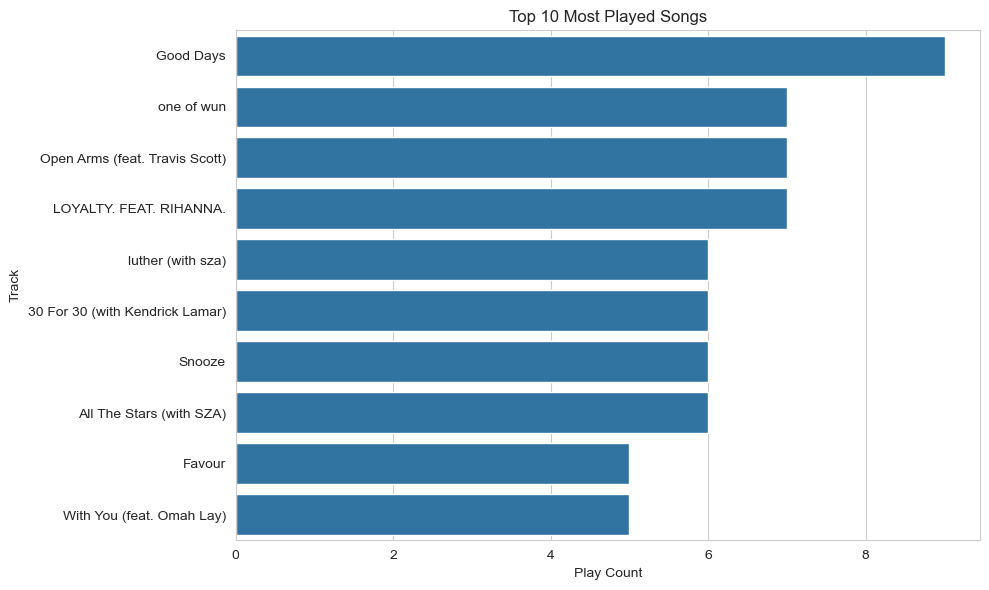

In [10]:

# --- KPI 1: Most Played Songs ---
# Count the number of times each song was played
# and sort them in descending order
#  Get the top 10 most played songs
#  and plot them
most_played_songs = spotify_trend['Track'].value_counts().head(10)
plt.figure()
sns.barplot(x=most_played_songs.values, y=most_played_songs.index) 
plt.title("Top 10 Most Played Songs")
plt.xlabel("Play Count")
plt.ylabel("Track")
plt.tight_layout()
plt.show()


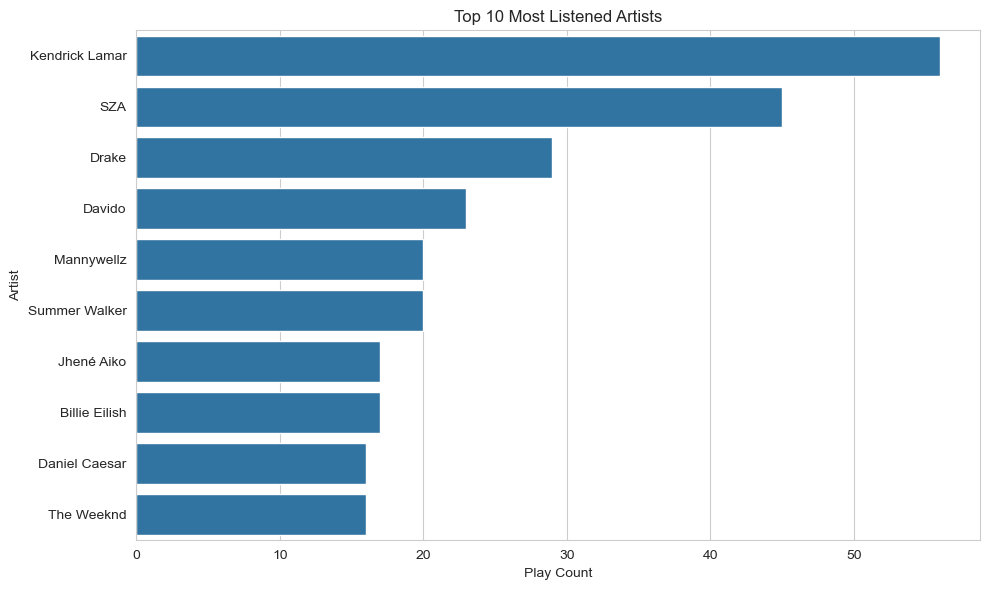

In [11]:
# --- KPI 2: Most Listened Artists ---
# Count the number of times each artist was played
# and sort them in descending order
#  Get the top 10 most listened artists
#  and plot them
most_listened_artists = spotify_trend['Artist'].value_counts().head(10)
plt.figure()
sns.barplot(x=most_listened_artists.values, y=most_listened_artists.index)
plt.title("Top 10 Most Listened Artists")
plt.xlabel("Play Count")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

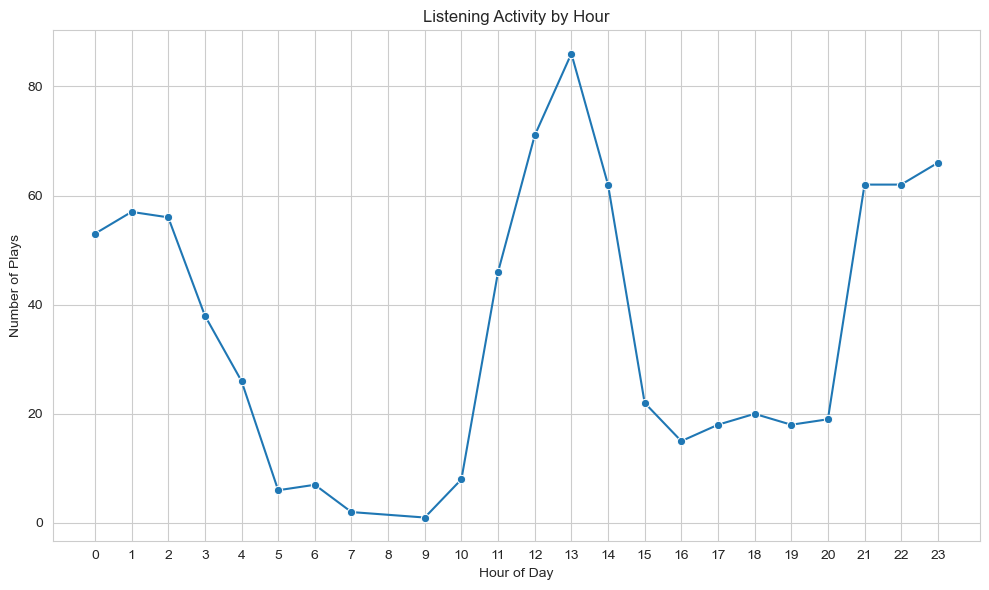

In [12]:
# --- KPI 3: Listening Activity by Hour ---
# Count the number of plays for each hour of the day
#  and plot them
#  Get the number of plays for each hour
#  and sort them in ascending order
most_active_hours = spotify_trend['Hour Played'].value_counts().sort_index()
plt.figure()
sns.lineplot(x=most_active_hours.index, y=most_active_hours.values, marker="o")
plt.title("Listening Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Plays")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

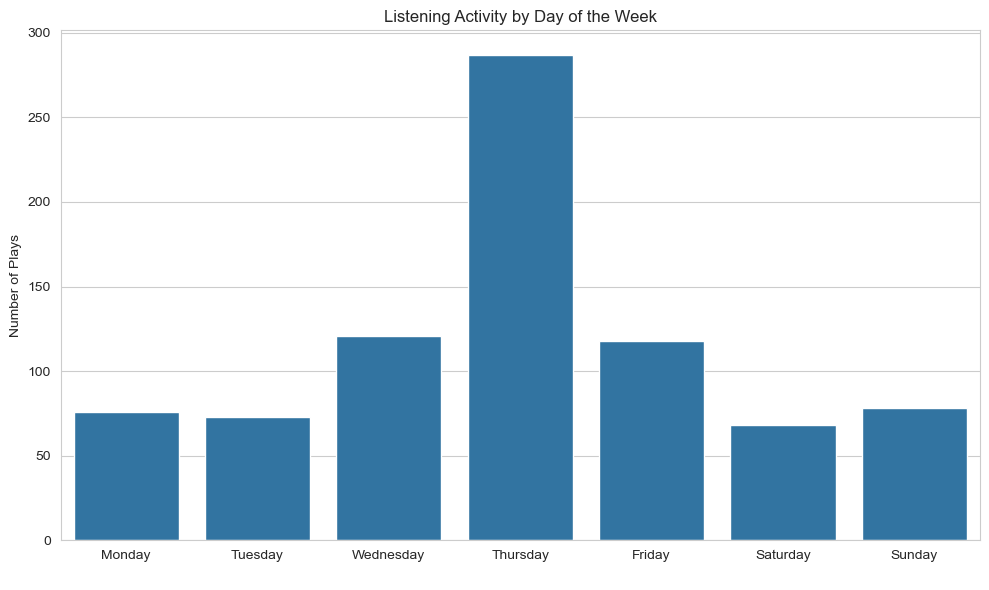

In [13]:
# --- KPI 4: Listening by Day of the Week ---
# Count the number of plays for each day of the week
#  and plot them
#  Get the number of plays for each day
#  and sort them in the order of the week
most_active_days = spotify_trend['Day of Week'].value_counts()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure()
sns.barplot(
    x=most_active_days.loc[day_order].index,
    y=most_active_days.loc[day_order].values
)
plt.title("Listening Activity by Day of the Week")
plt.xlabel(" ")
plt.ylabel("Number of Plays")
plt.tight_layout()
plt.show()

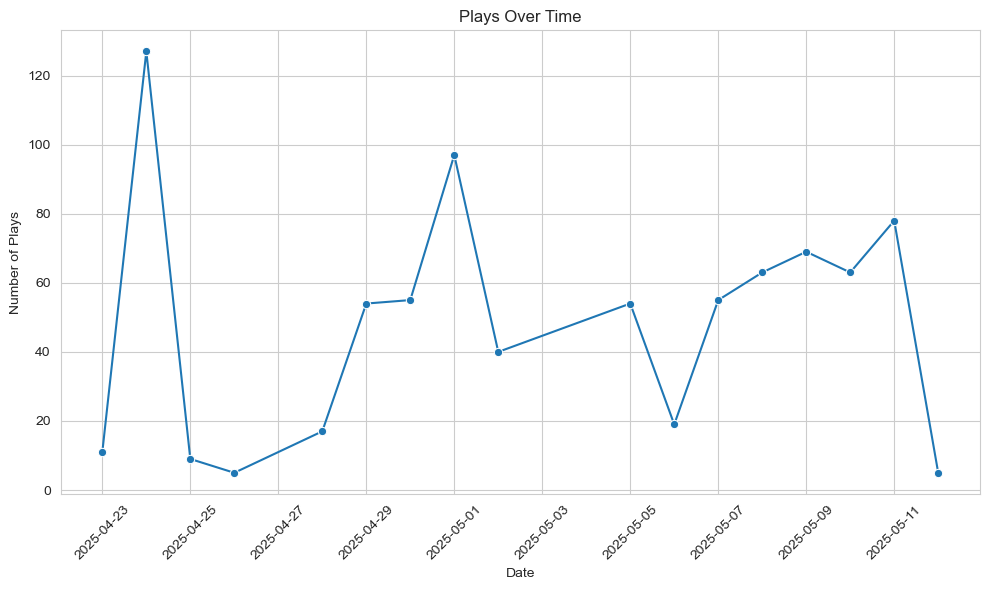

In [14]:
# --- KPI 5: Plays Over Time ---
# Count the number of plays for each date
#  and plot them
#  Get the number of plays for each date
#  and sort them in ascending order
plays_per_day = spotify_trend['Date'].value_counts().sort_index()
plt.figure()
sns.lineplot(x=plays_per_day.index, y=plays_per_day.values, marker="o")
plt.title("Plays Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Plays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()